In [194]:
import pandas as pd
import os
import zipfile
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

# Read in Data

In [178]:
base_path = '../../data/'

In [657]:
acs_data_dict = pd.read_csv(os.path.join(base_path, 'acs5_data_dictionary.csv'))
acs = pd.read_excel(os.path.join(base_path, 'national_acs5-2018_census.xlsx'))

In [658]:
acs_data_dict.head()

,variable,label,concept,predicateType
0,DP02_0001E,Estimate!!HOUSEHOLDS BY TYPE!!Total households,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int
1,DP02_0001PE,Percent Estimate!!HOUSEHOLDS BY TYPE!!Total ho...,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int
2,DP02_0002E,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int
3,DP02_0002PE,Percent Estimate!!HOUSEHOLDS BY TYPE!!Total ho...,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,float
4,DP02_0003E,Estimate!!HOUSEHOLDS BY TYPE!!Total households...,SELECTED SOCIAL CHARACTERISTICS IN THE UNITED ...,int


In [660]:
acs.head(2)

,index,DP02_0001E,DP02_0001PE,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,DP02_0005E,DP02_0005PE,DP02_0006E,DP02_0006PE,DP02_0007E,DP02_0007PE,DP02_0008E,DP02_0008PE,DP02_0009E,DP02_0009PE,DP02_0010E,DP02_0010PE,DP02_0011E,DP02_0011PE,DP02_0012E,DP02_0012PE,DP02_0013E,DP02_0013PE,DP02_0014E,DP02_0014PE,DP02_0015E,DP02_0015PE,DP02_0016E,DP02_0016PE,DP02_0017E,DP02_0017PE,DP02_0018E,DP02_0018PE,DP02_0019E,DP02_0019PE,DP02_0020E,DP02_0020PE,DP02_0021E,DP02_0021PE,DP02_0022E,DP02_0022PE,DP02_0023E,DP02_0023PE,DP02_0024E,DP02_0024PE,DP02_0025E,DP02_0025PE,DP02_0026E,DP02_0026PE,DP02_0027E,DP02_0027PE,DP02_0028E,DP02_0028PE,DP02_0029E,DP02_0029PE,DP02_0030E,DP02_0030PE,DP02_0031E,DP02_0031PE,DP02_0032E,DP02_0032PE,DP02_0033E,DP02_0033PE,DP02_0034E,DP02_0034PE,DP02_0035E,DP02_0035PE,DP02_0036E,DP02_0036PE,DP02_0037E,DP02_0037PE,DP02_0038E,DP02_0038PE,DP02_0039E,DP02_0039PE,DP02_0040E,DP02_0040PE,DP02_0041E,DP02_0041PE,DP02_0042E,DP02_0042PE,DP02_0043E,DP02_0043PE,DP02_0044E,DP02_0044PE,DP02_0045E,DP02_0045PE,DP02_0046E,DP02_0046PE,DP02_0047E,DP02_0047PE,DP02_0048E,DP02_0048PE,DP02_0049E,DP02_0049PE,DP02_0050E,...,DP05_0035PE,DP05_0036E,DP05_0036PE,DP05_0037E,DP05_0037PE,DP05_0038E,DP05_0038PE,DP05_0039E,DP05_0039PE,DP05_0040E,DP05_0040PE,DP05_0041E,DP05_0041PE,DP05_0042E,DP05_0042PE,DP05_0043E,DP05_0043PE,DP05_0044E,DP05_0044PE,DP05_0045E,DP05_0045PE,DP05_0046E,DP05_0046PE,DP05_0047E,DP05_0047PE,DP05_0048E,DP05_0048PE,DP05_0049E,DP05_0049PE,DP05_0050E,DP05_0050PE,DP05_0051E,DP05_0051PE,DP05_0052E,DP05_0052PE,DP05_0053E,DP05_0053PE,DP05_0054E,DP05_0054PE,DP05_0055E,DP05_0055PE,DP05_0056E,DP05_0056PE,DP05_0057E,DP05_0057PE,DP05_0058E,DP05_0058PE,DP05_0059E,DP05_0059PE,DP05_0060E,DP05_0060PE,DP05_0061E,DP05_0061PE,DP05_0062E,DP05_0062PE,DP05_0063E,DP05_0063PE,DP05_0064E,DP05_0064PE,DP05_0065E,DP05_0065PE,DP05_0066E,DP05_0066PE,DP05_0067E,DP05_0067PE,DP05_0068E,DP05_0068PE,DP05_0069E,DP05_0069PE,DP05_0070E,DP05_0070PE,DP05_0071E,DP05_0071PE,DP05_0072E,DP05_0072PE,DP05_0073E,DP05_0073PE,DP05_0074E,DP05_0074PE,DP05_0075E,DP05_0075PE,DP05_0076E,DP05_0076PE,DP05_0077E,DP05_0077PE,DP05_0078E,DP05_0078PE,DP05_0079E,DP05_0079PE,DP05_0080E,DP05_0080PE,DP05_0081E,DP05_0081PE,DP05_0082E,DP05_0082PE,DP05_0083E,DP05_0083PE,DP05_0084E,DP05_0084PE,GEOID
0,"Petersburg Borough, Alaska: Summary level: 050...",1170.0,1170.0,763.0,65.2,288.0,24.6,580.0,49.6,189.0,16.2,38.0,3.2,29.0,2.5,145.0,12.4,70.0,6.0,407.0,34.8,331.0,28.3,156.0,13.3,308.0,26.3,455.0,38.9,2.72,-888888888.0,3.41,-888888888.0,3178.0,3178.0,1170.0,36.8,588.0,18.5,935.0,29.4,318.0,10.0,167.0,5.3,82.0,2.6,1360.0,1360.0,525.0,38.6,697.0,51.3,7.0,0.5,25.0,1.8,106.0,7.8,1275.0,1275.0,268.0,21.0,644.0,50.5,44.0,3.5,130.0,10.2,189.0,14.8,38.0,38.0,18.0,47.4,49.0,-888888888.0,59.0,-888888888.0,0.0,-888888888.0,119.0,-888888888.0,18.0,-888888888.0,38.0,38.0,5.0,13.2,0.0,0.0,0.0,0.0,1.0,2.6,4.0,10.5,5.0,5.0,3.0,...,10.0,2931,90.0,2346,72.1,23,0.7,237,7.3,26,0.8,0,0.0,0,0.0,0,0.0,302,9.3,0,0.0,38,1.2,149,4.6,21,0.6,25,0.8,4,0.1,65,2.0,17,0.5,0,0.0,0,0.0,17,0.5,0,0.0,6,0.2,324,10.0,6,0.2,118,3.6,81,2.5,4,0.1,3255,3255,2613,80.3,37,1.1,410,12.6,457,14.0,78,2.4,12,0.4,3255,3255,337,10.4,181,5.6,15,0.5,3,0.1,138,4.2,2918,89.6,2050,63.0,23,0.7,221,6.8,299,9.2,17,0.5,1,0.0,307,9.4,2,0.1,2195
1,"Kusilvak Census Area, Alaska: Summary level: 0...",1692.0,1692.0,1415.0,83.6,895.0,52.9,657.0,38.8,461.0,27.2,296.0,17.5,171.0,10.1,462.0,27.3,263.0,15.5,277.0,16.4,217.0,12.8,49.0,2.9,1186.0,70.1,374.0,22.1,4.69,-888888888.0,5.05,-888888888.0,7929.0,7929.0,1692.0,21.3,675.0,8.5,3591.0,45.3,1468.0,18.5,503.0,6.3,289.0,3.6,2887.0,2887.0,1815.0,62.9,824.0,28.5,70.0,2.4,52.0,1.8,126.0,4.4,2464.0,2464.0,1338.0,54.3,750.0,30.4,66.0,2.7,219.0,8.9,91.0,3.7,204.0,204.0,169.0,82.8,127.0,-888888888.0,115.0,-888888888.0,27.0,-888888888.0,191.0,-888888888.0,51.0,-888888888.0,696.0,696.0,460.0,66.1,74.0,10.6,85.0,12.2,64.0,9.2,237.0,34.1,460.0,460.0,269.0,...,3.7,7896,96.3,319,3.9,60,0.7,7480,91.2,0,0.0

In [180]:
zf = zipfile.ZipFile(os.path.join(base_path,'brownfields_data_with_county_geoid.zip'), 'r')
brownfields = pd.read_csv(zf.open('brownfields_data_with_county_geoid.csv'))

/home/helloannietran/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (18,19,20,21,22,23,43,44,46,48,53,57,61,62,64,65,67,68,69,74,76,77,78,86,87,89,98) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
brownfields.shape

(78527, 150)

In [7]:
brownfields.head(2)

,Grant Recipient Name,Accomplishment Counted,Cooperative Agreement Number,Type of Brownfields Grant,ACRES Property ID,Property Name,Property Address 1,Property City,Property State,Property Zip Code,IC Data Address,Redev Completion Date,Property Size,Local Parcel Number,Ownership Entity,Current Owner,Did Ownership Change,SFLLP fact into the ownership,Property Latitude,Property Longitude,Horizontal Collection Method,Source Map Scale,Reference Point,Horizontal Reference Datum,Description/History,Past Use: Greenspace (arces),Past Use: Residential (arces),Past Use: Commercial (arces),Past Use: Industrial (arces),Past Use: Multistory (arces),Future Use: Multistory (arces),Assessment Phase,Assessment Start Date,Assessment Completion Date,Source of Assessment Funding,Entity Providing Assmnt Funds,Amt of Assessment Funding,Cleanup Required,Cntmnt Fnd-Arsenic,Cntmnt Fnd-Asbestos,Cntmnt Fnd-Cadmium,Cntmnt Fnd-Chromium,Cntmnt Fnd-Ctrl Sbstncs,Cntmnt Fnd-Copper,Cntmnt Fnd-Iron,Cntmnt Fnd-Lead,Cntmnt Fnd-Mercury,Cntmnt Fnd-Nickel,Cntmnt Fnd-None,Cntmnt Fnd-Other,Cntmnt Fnd-Other Metals,Cntmnt Fnd-PAHs,Cntmnt Fnd-PCBs,Cntmnt Fnd-Pesticides,Cntmnt Fnd-Petroleum,Cntmnt Fnd-Selenium,Cntmnt Fnd-SVOCs,Cntmnt Fnd-Unknown,Cntmnt Fnd-VOCs,Cntmnt Clnd Up-Arsenic,Cntmnt Clnd Up-Asbestos,Cntmnt Clnd Up-Cadmium,Cntmnt Clnd Up-Chromium,Cntmnt Clnd Up-Ctrl Sbstncs,Cntmnt Clnd Up-Copper,Cntmnt Clnd Up-Iron,Cntmnt Clnd Up-Lead,Cntmnt Clnd Up-Mercury,Cntmnt Clnd Up-Nickel,Cntmnt Clnd Up-None,Cntmnt Clnd Up-Other,Cntmnt Clnd Up-Other Metals,Cntmnt Clnd Up-PAHs,Cntmnt Clnd Up-PCBs,Cntmnt Clnd Up-Pesticides,Cntmnt Clnd Up-Petroleum,Cntmnt Clnd Up-Selenium,Cntmnt Clnd Up-SVOCs,Cntmnt Clnd Up-Unknown,Cntmnt Clnd Up-VOCs,Cntmnt Fnd-Other (Descr),Cntmnt Clnd Up-Other (Descr),Media Affected-Unknown,Media Clnd Up-Sediments,Media Clnd Up-Soil,Media Clnd Up-Surface Water,Media Clnd Up-Unknown,Media Clnd Up-Drnking Water,Media Clnd Up-Ground Water,Media Clnd Up-Indoor Air,Media Affected-Sediments,Media Affected-Bldg Materials,Media Affected-Soil,Media Affected-Surface Water,Media Clnd Up-Bldg Materials,Media Clnd Up-Air,Media Affected-Drnking Water,Media Affected-Ground Water,Media Affected-Indoor Air,Media Affected-Air,Institutional Ctrl (ICs) Req?,IC Catgry-Proprietary Ctrls,IC Catgry-Informational Dev,IC Catgry-Govmntal Ctrls,IC Catgry-Enfrcmnt/Prmt Tools,ICs in Place?,Date ICs in Place,Cleanup Start Date,Cleanup Completion Date,ACRES Cleaned Up,Source of Cleanup Funding,Entity Prvding Cleanup Funds,Amount of Cleanup Funding,Redevelopment Start Date,Future Use-Greenspace,Future Use-Residential,Future Use-Commercial,Future Use-Industrial,Acreage and Greenspace Created,Src of Redev Funding,Entity Prvding Redev Funds,Amount of Redev Funding,# of Cleanup and Redev Jobs,Photographs are available,Video is available,2010 # Below Poverty,2010 % Below Poverty,2010 Median Income,2010 # Low Income,2010 % Low Income,2010 # Vacant Housing,2010 % Vacant Housing,2010 # Unemployed,2010 % Unemployed,Other Media Ind,Type of Funding,Ready For Reuse Ind,Enrollment ST/Tribal Prg,ST/Tribal Prg ID Number,Further Action/Cleanup,Radius,EPA Region,Grant ID,Highlights,Program Code,Stcntrbg,ASSESSMENT YEAR,ROW COUNT,GEOID,COUNTY NAME
0,Tuscola Cty Brownfield RA,NaN,00E46901,Assessment,97204,Proposed Industrial Park,M-24,Mayville,MI,48744,NaN,NaN,22.00,040-025-000-0300-03,Government,Village of Mayville,N,N,43.3402989,-83.3526126,NaN,NaN,NaN,North American Datum of 1927,The subject property consists of approximately...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01,NaN,NaN,NaN,10.0,NaN,USDOT,Other Federal Funding,75000.0,4.0,Y,N,96.0,14.41,2879.0,208.0,31.23,26.0,10.37,47.0,7.06,Y,Hazardous,N

# Focus on sites where Ready For Reuse Ind == Y

In [668]:
# filter to sites where Ready For Reuse Ind == Y since clean up there was finished or not needed
bf_ready_for_reuse = brownfields[brownfields['Ready For Reuse Ind']=='Y'].reset_index(drop=True).copy()


# adjust values to be consistent in categorical cols
bf_ready_for_reuse.loc[bf_ready_for_reuse['Cleanup Required']=='u', 'Cleanup Required'] = 'U'
bf_ready_for_reuse.loc[bf_ready_for_reuse['Did Ownership Change']=='n', 'Did Ownership Change'] = 'N'

# created a column to flag if grant was funded by EPA
bf_ready_for_reuse['Funded by EPA'] = 'N'
bf_ready_for_reuse.loc[bf_ready_for_reuse['Source of Assessment Funding'].fillna('N').str.contains('EPA'), 'Funded by EPA'] = 'Y'
bf_ready_for_reuse.loc[bf_ready_for_reuse['Source of Assessment Funding'].isnull(), 'Funded by EPA'] = np.nan

# filter to sites where clean up cost is not null
nonnull_cost = bf_ready_for_reuse[~bf_ready_for_reuse['Amount of Cleanup Funding'].isnull()]['ACRES Property ID']
bf_ready_for_reuse = bf_ready_for_reuse[bf_ready_for_reuse['ACRES Property ID'].isin(nonnull_cost)]

# group all the epa fundings together
bf_ready_for_reuse.loc[bf_ready_for_reuse['Source of Cleanup Funding'].fillna('N').str.contains('EPA'),'Source of Cleanup Funding'] = 'EPA'
bf_ready_for_reuse.loc[bf_ready_for_reuse['Source of Assessment Funding'].fillna('N').str.contains('EPA'),'Source of Assessment Funding'] = 'EPA'
bf_ready_for_reuse.loc[bf_ready_for_reuse['Src of Redev Funding'].fillna('N').str.contains('EPA'),'Src of Redev Funding'] = 'EPA'

In [670]:
# roll records up to site level for easier cost analysis
# counting sources of funding by the source of funding columns could be slightly off since
    # there are missing values in that column. The unknowns might be from different sources

# clean up funding
cols = ['ACRES Property ID','Source of Cleanup Funding','Amount of Cleanup Funding']
clean_up_cost_roll_up = bf_ready_for_reuse[cols].copy()
clean_up_cost_roll_up = clean_up_cost_roll_up[~clean_up_cost_roll_up['Amount of Cleanup Funding'].isnull()]
clean_up_cost_roll_up['Source of Cleanup Funding'] = clean_up_cost_roll_up['Source of Cleanup Funding'].fillna('Unknown')
clean_up_cost_roll_up = clean_up_cost_roll_up.drop_duplicates()
# count sources of funding and sum of funding for each site
clean_up_cost_roll_up = clean_up_cost_roll_up.groupby('ACRES Property ID').agg({'Source of Cleanup Funding':'nunique',
                                                        'Amount of Cleanup Funding':'sum'}).reset_index()


# assessment funding
cols = ['ACRES Property ID','Source of Assessment Funding','Amt of Assessment Funding']
assessment_cost_roll_up = bf_ready_for_reuse[cols].copy()
assessment_cost_roll_up = assessment_cost_roll_up[~assessment_cost_roll_up['Amt of Assessment Funding'].isnull()]
assessment_cost_roll_up['Source of Assessment Funding'] = assessment_cost_roll_up['Source of Assessment Funding'].fillna('Unknown')
assessment_cost_roll_up = assessment_cost_roll_up.drop_duplicates()
# count sources of funding and sum of funding for each site
assessment_cost_roll_up = assessment_cost_roll_up.groupby('ACRES Property ID').agg({'Source of Assessment Funding':'nunique',
                                                        'Amt of Assessment Funding':'sum'}).reset_index()


#reve funding
cols = ['ACRES Property ID','Src of Redev Funding','Amount of Redev Funding']
redev_cost_roll_up = bf_ready_for_reuse[cols].copy()
redev_cost_roll_up = redev_cost_roll_up[~redev_cost_roll_up['Amount of Redev Funding'].isnull()]
redev_cost_roll_up['Src of Redev Funding'] = redev_cost_roll_up['Src of Redev Funding'].fillna('Unknown')
redev_cost_roll_up = redev_cost_roll_up.drop_duplicates()
# count sources of funding and sum of funding for each site
redev_cost_roll_up = redev_cost_roll_up.groupby('ACRES Property ID').agg({'Src of Redev Funding':'nunique',
                                                                          'Amount of Redev Funding':'sum'}).reset_index()


# combine to funding df
funding_df = clean_up_cost_roll_up.merge(assessment_cost_roll_up, how='outer')
funding_df = funding_df.merge(redev_cost_roll_up, how='outer')
# handle nulls
funding_df['Source of Assessment Funding'] = funding_df['Source of Assessment Funding'].fillna('No Assessment')
funding_df['Amt of Assessment Funding'] = funding_df['Amt of Assessment Funding'].fillna(0)
funding_df['Src of Redev Funding'] = funding_df['Src of Redev Funding'].fillna('No Redev')
funding_df['Amount of Redev Funding'] = funding_df['Amount of Redev Funding'].fillna(0)

funding_df['Overall Cleanup Cost'] = funding_df['Amt of Assessment Funding'] + funding_df['Amount of Cleanup Funding']

# count number of grants
#grant_cnts = funding_df.groupby('ACRES Property ID')['Grant ID'].nunique().reset_index()
#funding_df = funding_df.merge(grant_cnts, how='left')


# Type of Brownfields Grant
# shouldn't count TBA (to be announced?)
# BCRLF is a loan which should be treated separately from other grants


#Acreage and Greenspace
acr_greens = bf_ready_for_reuse[['ACRES Property ID','Acreage and Greenspace Created']].copy()
acr_greens['Acreage and Greenspace Created'] = acr_greens['Acreage and Greenspace Created'].fillna(0)
acr_greens = acr_greens.drop_duplicates()
acr_greens = acr_greens.groupby('ACRES Property ID')['Acreage and Greenspace Created'].sum().reset_index()
funding_df = funding_df.merge(acr_greens, how='left')


# add in characteristics of the property
property_features = ['Property City', 'Property  State', 'Property Size','Property Latitude',
                     'Property Longitude', 'Past Use: Greenspace (arces)','Past Use: Residential (arces)',
                     'Past Use: Commercial (arces)','Past Use: Industrial (arces)',
                     'Ownership Entity','Future Use-Greenspace','Future Use-Residential',
                     'Future Use-Commercial', 'Future Use-Industrial',
                     'Photographs are available', 'Video is available'
                    ]

property_df = bf_ready_for_reuse[['ACRES Property ID'] + property_features].drop_duplicates()
property_df['Property Longitude'] = property_df['Property Longitude'].astype(float)
property_df['Property Longitude'] = property_df['Property Longitude'].round(4)
property_df['Property Latitude'] = property_df['Property Latitude'].astype(float)
property_df['Property Latitude'] = property_df['Property Latitude'].round(4)
property_df = property_df.drop_duplicates()
arce_cols = [c for c in property_df if 'Past Use' in c or 'Future Use' in c]
for c in arce_cols:
    property_df[c] = property_df[c].fillna(0)
property_df['Photographs are available'] = property_df['Photographs are available'].fillna('N')
property_df['Video is available'] = property_df['Video is available'].fillna('N')

funding_df = funding_df.merge(property_df, how='left')
# fill null ownership entity with Government for now
funding_df['Ownership Entity'] = funding_df['Ownership Entity'].fillna('Government')


# add in census data
census_features = ['2010 # Below Poverty','2010 % Below Poverty','2010 Median Income',
                   '2010 # Low Income','2010 % Low Income','2010 # Vacant Housing',
                   '2010 % Vacant Housing','2010 # Unemployed','2010 % Unemployed']

census_df = bf_ready_for_reuse[['ACRES Property ID'] + census_features].drop_duplicates()
funding_df = funding_df.merge(census_df, how='left')



# tribal program
tribal_df = bf_ready_for_reuse[['ACRES Property ID', 'Enrollment ST/Tribal Prg']].copy().drop_duplicates()
tribal_df['Tribal Prg Enrolled'] = 'N'
tribal_df.loc[~tribal_df['Enrollment ST/Tribal Prg'].isnull(),'Tribal Prg Enrolled'] = 'Y'
funding_df = funding_df.merge(tribal_df[['ACRES Property ID','Tribal Prg Enrolled']], how='left')



# contaminant features
cntmnt_fnd_features = ['Cntmnt Fnd-Arsenic','Cntmnt Fnd-Asbestos','Cntmnt Fnd-Cadmium',
                       'Cntmnt Fnd-Chromium','Cntmnt Fnd-Ctrl Sbstncs','Cntmnt Fnd-Copper',
                       'Cntmnt Fnd-Iron','Cntmnt Fnd-Lead','Cntmnt Fnd-Mercury','Cntmnt Fnd-Nickel',
                       'Cntmnt Fnd-None','Cntmnt Fnd-Other','Cntmnt Fnd-Other Metals',
                       'Cntmnt Fnd-PAHs','Cntmnt Fnd-PCBs','Cntmnt Fnd-Pesticides',
                       'Cntmnt Fnd-Petroleum','Cntmnt Fnd-Selenium','Cntmnt Fnd-SVOCs',
                       'Cntmnt Fnd-Unknown','Cntmnt Fnd-VOCs']


cntmnt_fnd_df = bf_ready_for_reuse[['ACRES Property ID'] + cntmnt_fnd_features].copy().drop_duplicates()
cntmnt_fnd_df = cntmnt_fnd_df.fillna('N')
cntmnt_fnd_df = cntmnt_fnd_df.replace('N',0)
cntmnt_fnd_df = cntmnt_fnd_df.replace('Y',1)

# count of contaminants found
cntmnt_fnd_df['# of Cntmnt Fnd'] = cntmnt_fnd_df[cntmnt_fnd_features].sum(axis=1)
funding_df = funding_df.merge(cntmnt_fnd_df, how='left')



# where contaminants is found
cntmnt_where_features = ['Media Affected-Unknown','Media Affected-Sediments',
                         'Media Affected-Bldg Materials','Media Affected-Soil',
                         'Media Affected-Surface Water','Media Affected-Drnking Water',
                         'Media Affected-Ground Water','Media Affected-Indoor Air',
                         'Media Affected-Air']

cntmnt_where_df = bf_ready_for_reuse[['ACRES Property ID'] + cntmnt_where_features].copy().drop_duplicates()
cntmnt_where_df = cntmnt_where_df.fillna('N')
cntmnt_where_df = cntmnt_where_df.replace('N',0)
cntmnt_where_df = cntmnt_where_df.replace('Y',1)

# count of contaminants found
cntmnt_where_df['# Media Affected'] = cntmnt_where_df[cntmnt_where_features].sum(axis=1)
funding_df = funding_df.merge(cntmnt_where_df, how='left')


In [704]:
funding_df.shape

(2271, 67)

In [705]:
funding_df.head()

,ACRES Property ID,Source of Cleanup Funding,Amount of Cleanup Funding,Source of Assessment Funding,Amt of Assessment Funding,Src of Redev Funding,Amount of Redev Funding,Overall Cleanup Cost,Acreage and Greenspace Created,Property City,Property State,Property Size,Property Latitude,Property Longitude,Past Use: Greenspace (arces),Past Use: Residential (arces),Past Use: Commercial (arces),Past Use: Industrial (arces),Ownership Entity,Future Use-Greenspace,Future Use-Residential,Future Use-Commercial,Future Use-Industrial,Photographs are available,Video is available,2010 # Below Poverty,2010 % Below Poverty,2010 Median Income,2010 # Low Income,2010 % Low Income,2010 # Vacant Housing,2010 % Vacant Housing,2010 # Unemployed,2010 % Unemployed,Tribal Prg Enrolled,Cntmnt Fnd-Arsenic,Cntmnt Fnd-Asbestos,Cntmnt Fnd-Cadmium,Cntmnt Fnd-Chromium,Cntmnt Fnd-Ctrl Sbstncs,Cntmnt Fnd-Copper,Cntmnt Fnd-Iron,Cntmnt Fnd-Lead,Cntmnt Fnd-Mercury,Cntmnt Fnd-Nickel,Cntmnt Fnd-None,Cntmnt Fnd-Other,Cntmnt Fnd-Other Metals,Cntmnt Fnd-PAHs,Cntmnt Fnd-PCBs,Cntmnt Fnd-Pesticides,Cntmnt Fnd-Petroleum,Cntmnt Fnd-Selenium,Cntmnt Fnd-SVOCs,Cntmnt Fnd-Unknown,Cntmnt Fnd-VOCs,# of Cntmnt Fnd,Media Affected-Unknown,Media Affected-Sediments,Media Affected-Bldg Materials,Media Affected-Soil,Media Affected-Surface Water,Media Affected-Drnking Water,Media Affected-Ground Water,Media Affected-Indoor Air,Media Affected-Air,# Media Affected
0,10027,1,104351.0,2,80000.00,No Redev,0.0,184351.00,0.0,Holyoke,MA,1.40,42.2038,-72.5939,0.0,0.0,0.0,1.40,Government,0.00,0.0,0.0,0.0,Y,N,2031.0,65.18,1772.0,2614.0,83.89,117.0,9.60,313.0,10.04,Y,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,4,0,0,0,1,0,0,0,0,0,1
1,10060,1,200000.0,2,138827.33,No Redev,0.0,338827.33,0.0,Camden,ME,3.50,44.2155,-69.0770,0.0,0.0,0.0,3.50,Government,0.00,0.0,0.0,0.0,N,N,72.0,6.75,3823.0,378.0,35.43,171.0,25.06,22.0,2.06,Y,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,4,0,0,0,1,0,0,0,0,0,1
2,10075,1,200000.0,1,160437.00,No Redev,0.0,360437.00,0.0,Brookfield,MA,0.67,42.2088,-72.1003,0.0,0.0,0.0,0.67,Government,0.67,0.0,0.0,0.0,Y,N,3.0,0.53,1823.0,128.0,22.54,18.0,6.92,14.0,2.46,Y,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,4,0,0,0,1,0,0,1,0,0,2
3,10078,1,1000000.0,1,10116.00,No Redev,0.0,1010116.00,0.0,Troy,NH,18.69,42.8254,-72.1789,0.0,0.0,0.0,18.69,Private,0.00,0.0,0.0,0.0,Y,N,64.0,10.06,3982.0,189.0,29.72,7.0,2.76,30.0,4.72,Y,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,5,0,1,1,1,0,0,1,0,0,4
4,10085,2,240000.0,2,2.00,No Redev,0.0,240002.00,0.0,Essex,MA,1.30,42.6330,-70.7794,0.0,0.0,0.0,0.00,NaN,0.00,0.0,0.0,0.0,Y,Y,320.0,11.03,6454.0,681.0,23.47,87.0,6.23,167.0,5.75,N,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,5,0,0,0,1,0,0,0,0,0,1


# Preprocess

In [753]:
keep_features = ['Video is available','Photographs are available',
                'Future Use-Commercial' ,'Future Use-Residential','Future Use-Greenspace' ,
#               'Future Use-Industrial',
#                 'Past Use: Commercial (arces)','Past Use: Residential (arces)',
#                 'Past Use: Greenspace (arces)' ,'Past Use: Industrial (arces)', 
#                 'Property Size',  'Acreage and Greenspace Created'
                'Tribal Prg Enrolled','Ownership Entity']
keep_features = keep_features + [c for c in funding_df if 'Cntmnt' in c or 'Media Affected'in c]
target = 'Overall Cleanup Cost'

model_df = funding_df[keep_features+[target]]

# transform categorical variables
cat_mapping = {"Video is available":{"N": 0, "Y": 1},
               "Photographs are available":{"N": 0, "Y": 1},
               "Tribal Prg Enrolled":{"N": 0, "Y": 1},
               "Ownership Entity":{"Government": 0, "Private": 1}}
model_df = model_df.replace(cat_mapping)

# log transformation
log_features = [c for c in model_df if 'Future Use' in c or 'Past Use' in c]
log_features = log_features + ['# of Cntmnt Fnd', '# Media Affected', target]

for f in log_features:
    model_df[f + ' Log'] = np.log(model_df[f])
    model_df.drop(f, axis=1, inplace=True)

# EDA

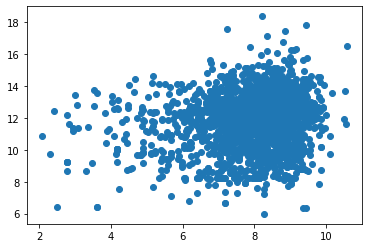

In [771]:
# none of the census data seem to correlate with overall clean up cost
plt.scatter(np.log(funding_df['2010 Median Income']), np.log(funding_df['Overall Cleanup Cost']))

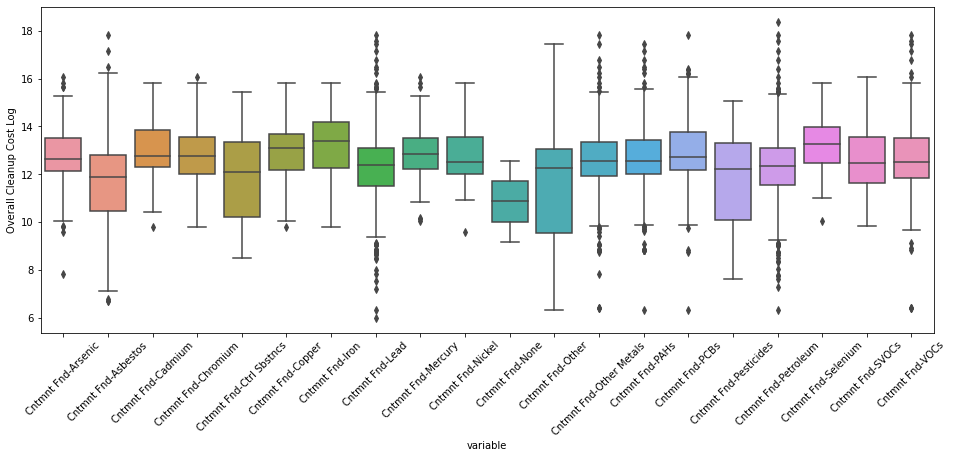

In [796]:
# differences in cost based on what contaminents were found, not surprisingly
# some are more varied than others


plt.figure(figsize=(16, 6))

cntmnt_cols = [c for c in funding_df if 'Cntmnt Fnd-' in c]
cont_fnd = pd.melt(funding_df, id_vars=['ACRES Property ID','Overall Cleanup Cost'], value_vars=cntmnt_cols)
cont_fnd = cont_fnd[cont_fnd['value']==1]
cont_fnd['Overall Cleanup Cost Log'] = np.log(cont_fnd['Overall Cleanup Cost'])
sns.boxplot(x='variable', y='Overall Cleanup Cost Log', data=cont_fnd)

t = plt.xticks(rotation = 45)

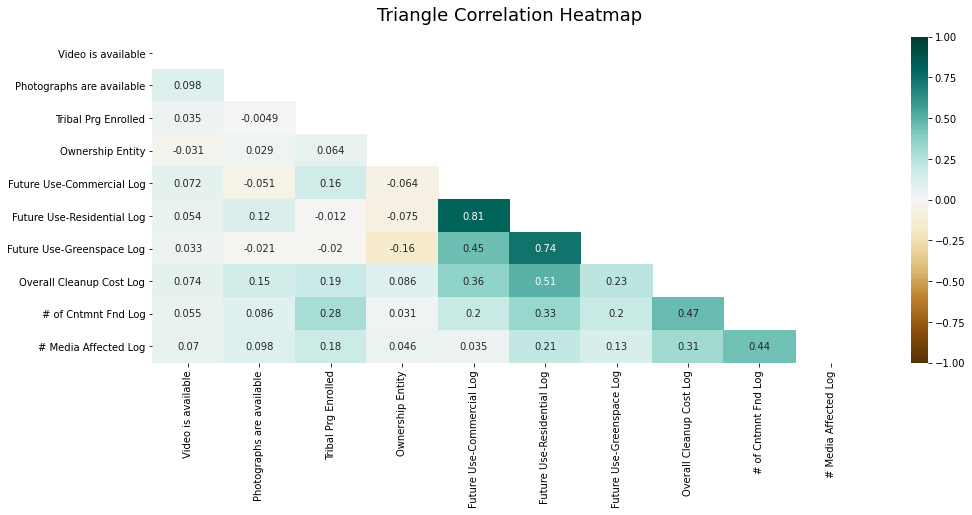

In [763]:
plt.figure(figsize=(16, 6))

f = [c for c in model_df if 'Cntmnt' not in c and 'Affected' not in c] + ['# of Cntmnt Fnd Log','# Media Affected Log']
df = model_df[f]
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

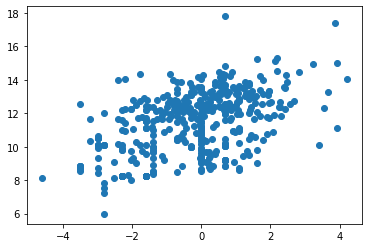

In [756]:
plt.scatter(model_df['Future Use-Residential Log'], model_df['Overall Cleanup Cost Log'])

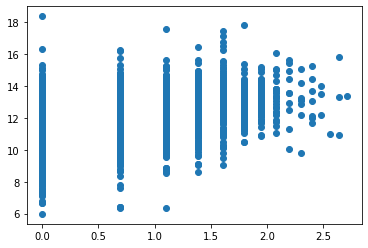

In [764]:
plt.scatter(model_df['# of Cntmnt Fnd Log'], model_df['Overall Cleanup Cost Log'])

<AxesSubplot:xlabel='Tribal Prg Enrolled', ylabel='Overall Cleanup Cost Log'>

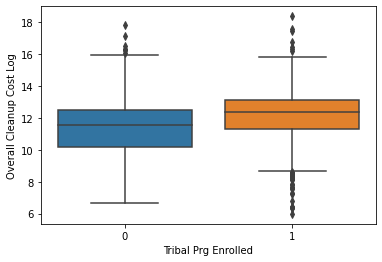

In [759]:
sns.boxplot(x='Tribal Prg Enrolled', y = 'Overall Cleanup Cost Log', data=model_df)

<AxesSubplot:xlabel='Photographs are available', ylabel='Overall Cleanup Cost Log'>

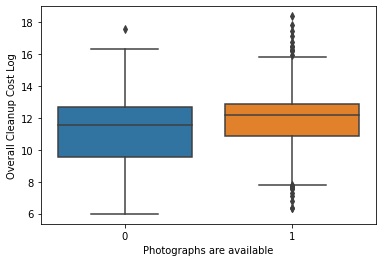

In [770]:
sns.boxplot(x='Photographs are available', y = 'Overall Cleanup Cost Log', data=model_df)

In [772]:
model_df.head()

,Video is available,Photographs are available,Tribal Prg Enrolled,Ownership Entity,Cntmnt Fnd-Arsenic,Cntmnt Fnd-Asbestos,Cntmnt Fnd-Cadmium,Cntmnt Fnd-Chromium,Cntmnt Fnd-Ctrl Sbstncs,Cntmnt Fnd-Copper,Cntmnt Fnd-Iron,Cntmnt Fnd-Lead,Cntmnt Fnd-Mercury,Cntmnt Fnd-Nickel,Cntmnt Fnd-None,Cntmnt Fnd-Other,Cntmnt Fnd-Other Metals,Cntmnt Fnd-PAHs,Cntmnt Fnd-PCBs,Cntmnt Fnd-Pesticides,Cntmnt Fnd-Petroleum,Cntmnt Fnd-Selenium,Cntmnt Fnd-SVOCs,Cntmnt Fnd-Unknown,Cntmnt Fnd-VOCs,Media Affected-Unknown,Media Affected-Sediments,Media Affected-Bldg Materials,Media Affected-Soil,Media Affected-Surface Water,Media Affected-Drnking Water,Media Affected-Ground Water,Media Affected-Indoor Air,Media Affected-Air,Future Use-Commercial Log,Future Use-Residential Log,Future Use-Greenspace Log,# of Cntmnt Fnd Log,# Media Affected Log,Overall Cleanup Cost Log
0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-inf,-inf,-inf,1.386294,0.000000,12.124597
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,-inf,-inf,-inf,1.386294,0.000000,12.733246
2,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,-inf,-inf,-0.400478,1.386294,0.693147,12.795072
3,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,0,-inf,-inf,-inf,1.609438,1.386294,13.825576
4,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,-inf,-inf,-inf,1.609438,0.000000,12.388403


In [781]:
funding_df.head()

,ACRES Property ID,Source of Cleanup Funding,Amount of Cleanup Funding,Source of Assessment Funding,Amt of Assessment Funding,Src of Redev Funding,Amount of Redev Funding,Overall Cleanup Cost,Acreage and Greenspace Created,Property City,Property State,Property Size,Property Latitude,Property Longitude,Past Use: Greenspace (arces),Past Use: Residential (arces),Past Use: Commercial (arces),Past Use: Industrial (arces),Ownership Entity,Future Use-Greenspace,Future Use-Residential,Future Use-Commercial,Future Use-Industrial,Photographs are available,Video is available,2010 # Below Poverty,2010 % Below Poverty,2010 Median Income,2010 # Low Income,2010 % Low Income,2010 # Vacant Housing,2010 % Vacant Housing,2010 # Unemployed,2010 % Unemployed,Tribal Prg Enrolled,Cntmnt Fnd-Arsenic,Cntmnt Fnd-Asbestos,Cntmnt Fnd-Cadmium,Cntmnt Fnd-Chromium,Cntmnt Fnd-Ctrl Sbstncs,Cntmnt Fnd-Copper,Cntmnt Fnd-Iron,Cntmnt Fnd-Lead,Cntmnt Fnd-Mercury,Cntmnt Fnd-Nickel,Cntmnt Fnd-None,Cntmnt Fnd-Other,Cntmnt Fnd-Other Metals,Cntmnt Fnd-PAHs,Cntmnt Fnd-PCBs,Cntmnt Fnd-Pesticides,Cntmnt Fnd-Petroleum,Cntmnt Fnd-Selenium,Cntmnt Fnd-SVOCs,Cntmnt Fnd-Unknown,Cntmnt Fnd-VOCs,# of Cntmnt Fnd,Media Affected-Unknown,Media Affected-Sediments,Media Affected-Bldg Materials,Media Affected-Soil,Media Affected-Surface Water,Media Affected-Drnking Water,Media Affected-Ground Water,Media Affected-Indoor Air,Media Affected-Air,# Media Affected
0,10027,1,104351.0,2,80000.00,No Redev,0.0,184351.00,0.0,Holyoke,MA,1.40,42.2038,-72.5939,0.0,0.0,0.0,1.40,Government,0.00,0.0,0.0,0.0,Y,N,2031.0,65.18,1772.0,2614.0,83.89,117.0,9.60,313.0,10.04,Y,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,4,0,0,0,1,0,0,0,0,0,1
1,10060,1,200000.0,2,138827.33,No Redev,0.0,338827.33,0.0,Camden,ME,3.50,44.2155,-69.0770,0.0,0.0,0.0,3.50,Government,0.00,0.0,0.0,0.0,N,N,72.0,6.75,3823.0,378.0,35.43,171.0,25.06,22.0,2.06,Y,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,4,0,0,0,1,0,0,0,0,0,1
2,10075,1,200000.0,1,160437.00,No Redev,0.0,360437.00,0.0,Brookfield,MA,0.67,42.2088,-72.1003,0.0,0.0,0.0,0.67,Government,0.67,0.0,0.0,0.0,Y,N,3.0,0.53,1823.0,128.0,22.54,18.0,6.92,14.0,2.46,Y,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,4,0,0,0,1,0,0,1,0,0,2
3,10078,1,1000000.0,1,10116.00,No Redev,0.0,1010116.00,0.0,Troy,NH,18.69,42.8254,-72.1789,0.0,0.0,0.0,18.69,Private,0.00,0.0,0.0,0.0,Y,N,64.0,10.06,3982.0,189.0,29.72,7.0,2.76,30.0,4.72,Y,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,5,0,1,1,1,0,0,1,0,0,4
4,10085,2,240000.0,2,2.00,No Redev,0.0,240002.00,0.0,Essex,MA,1.30,42.6330,-70.7794,0.0,0.0,0.0,0.00,Government,0.00,0.0,0.0,0.0,Y,Y,320.0,11.03,6454.0,681.0,23.47,87.0,6.23,167.0,5.75,N,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,5,0,0,0,1,0,0,0,0,0,1


In [767]:
import plotly.graph_objects as go

df = funding_df.copy()
# normalize a bit
df['Overall Cleanup Cost'] = np.log(df['Overall Cleanup Cost'])

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

fig = go.Figure(data=go.Scattergeo(
    lat = df['Property Latitude'],
    lon = df['Property Longitude'],
    text = df['ACRES Property ID'],
    marker = dict(
        color = df['Overall Cleanup Cost'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,
        cmin = 0,
        cmax = df['Overall Cleanup Cost'].max(),
        colorbar_title="Log of Overall Cleanup Cost"
    )
))

fig.update_layout(
    geo = dict(
        scope = 'usa',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = False,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        projection_type='albers usa',
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    )
)
fig.show()

# Model